## 실습1

In [50]:
import numpy as np

# 입력 데이터와 필터 정의
input_data_list = np.array([
    [-1, 1, 1, 1, -1, -1],
    [-1, 1, -1, 1, -1, -1],
    [-1, 1, 1, 1, -1, -1],
    [-1, -1, -1, 1, -1, -1],
    [-1, -1, -1, 1, -1, -1],
    [-1, -1, 1, -1, -1, -1],
    [-1, 1, -1, -1, -1, -1]
])

# 필터 정의 box_filter
filter1 = np.array([
    [1, 1, 1],
    [1, -1, 1],
    [1, 1, 1]
])

# 필터 정의 vertical_line_filter
filter2 = np.array([
    [-1, 1, -1],
    [-1, 1, -1],
    [-1, 1, -1]
])

# 필터 정의 diagonal_line_filter
filter3 = np.array([
    [-1, -1, 1],
    [-1, 1, -1],
    [1, -1, -1]
])
# 패딩
padded_input = np.pad(input_data_list, ((1,1),(1,1)), 'constant')

#합성곱 연산 함수 정의
def convolution(input_data, kernel):
    padded_input = np.pad(input_data_list, ((1,1),(1,1)), 'constant')
    input_height, input_width = input_data.shape
    kernel_height, kernel_width = kernel.shape
    output_height = input_height - kernel_height + 1
    output_width = input_width - kernel_width + 1
    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(input_data[i:i+kernel_height, j:j+kernel_width] * kernel)
            
    return output

# 활성화 함수 정의 (ReLU)
def relu(x):
    return np.maximum(0, x)


# 각 필터를 적용한 피처 맵 생성
feature_map1 = convolution(padded_input, filter1)
feature_map2 = convolution(padded_input, filter2)
feature_map3 = convolution(padded_input, filter3)

padded_input = np.pad(input_data_list, ((1,1),(1,1)), 'constant')

print("Padded Input:")
print(padded_input)

# 결과 출력
print("\nfeature Map 1:")
print(feature_map1)

print("\nFeature Map 2:")
print(feature_map1)

print("\nFeature Map 3:")
print(feature_map1)

# 각 피처 맵에 ReLU 함수 적용
relu_feature_map1 = relu(feature_map1)
relu_feature_map2 = relu(feature_map2)
relu_feature_map3 = relu(feature_map3)

# 결과 출력
print("\n\nrelu_feature_map1:")
print(relu_feature_map1)

print("\nrelu_feature_map1:")
print(relu_feature_map2)

print("\nrelu_feature_map1:")
print(relu_feature_map3)

Padded Input:
[[ 0  0  0  0  0  0  0  0]
 [ 0 -1  1  1  1 -1 -1  0]
 [ 0 -1  1 -1  1 -1 -1  0]
 [ 0 -1  1  1  1 -1 -1  0]
 [ 0 -1 -1 -1  1 -1 -1  0]
 [ 0 -1 -1 -1  1 -1 -1  0]
 [ 0 -1 -1  1 -1 -1 -1  0]
 [ 0 -1  1 -1 -1 -1 -1  0]
 [ 0  0  0  0  0  0  0  0]]

feature Map 1:
[[ 2. -2.  2. -2.  0. -2.]
 [ 2. -1.  9. -1. -1. -4.]
 [ 0. -5.  1. -3. -1. -4.]
 [-2. -3.  3. -3. -1. -4.]
 [-4. -5. -1. -5. -3. -4.]
 [-2. -3. -5. -3. -5. -4.]
 [ 0. -4.  0. -2. -4. -2.]]

Feature Map 2:
[[ 2. -2.  2. -2.  0. -2.]
 [ 2. -1.  9. -1. -1. -4.]
 [ 0. -5.  1. -3. -1. -4.]
 [-2. -3.  3. -3. -1. -4.]
 [-4. -5. -1. -5. -3. -4.]
 [-2. -3. -5. -3. -5. -4.]
 [ 0. -4.  0. -2. -4. -2.]]

Feature Map 3:
[[ 2. -2.  2. -2.  0. -2.]
 [ 2. -1.  9. -1. -1. -4.]
 [ 0. -5.  1. -3. -1. -4.]
 [-2. -3.  3. -3. -1. -4.]
 [-4. -5. -1. -5. -3. -4.]
 [-2. -3. -5. -3. -5. -4.]
 [ 0. -4.  0. -2. -4. -2.]]


relu_feature_map1:
[[2. 0. 2. 0. 0. 0.]
 [2. 0. 9. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.

In [51]:
# 최대 풀링 함수
def max_pooling(input_data, pool_size=(3, 3)):
    input_height, input_width = input_data.shape
    pool_height, pool_width = pool_size
    output_height = input_height // pool_height
    output_width = input_width // pool_width

    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            # 풀링 영역 내에서 최댓값 찾기
            pool_region = input_data[i*pool_height:(i+1)*pool_height, j*pool_width:(j+1)*pool_width]
            output[i, j] = np.max(pool_region)

    return output

# 풀링 레이어를 추가하여 2x2 풀링 결과 생성
pooling_size = (3, 3)
pooling_feature_map1 = max_pooling(relu_feature_map1, pooling_size)
pooling_feature_map2 = max_pooling(relu_feature_map2, pooling_size)
pooling_feature_map3 = max_pooling(relu_feature_map3, pooling_size)

In [52]:
# 결과 출력
print("Feature Map 1:")
print(pooling_feature_map1)

print("\nFeature Map 2:")
print(pooling_feature_map2)

print("\nFeature Map 3:")
print(pooling_feature_map3)

Feature Map 1:
[[9. 0.]
 [3. 0.]]

Feature Map 2:
[[5. 7.]
 [3. 7.]]

Feature Map 3:
[[2. 2.]
 [9. 5.]]


## 실습 2

In [1]:
import os 

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]= "2,3"  # Set the GPU 2 to use

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255 # normalization and reshaping for CNN 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255 # normalization and reshaping for CNN 

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10) # one-hot encoding 
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10) # one-hot encoding 

# 모델 구성
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28 ,1)))
model.add(Conv2D(64,(3 ,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2 ,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10 , activation='softmax'))

# 모델 컴파일 및 학습 
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x=x_train,y=y_train,
                  batch_size=300,
                  epochs=1,
                  verbose=1,
                  validation_data=(x_test,y_test))

score=model.evaluate(x=x_test,y=y_test)
print("loss:",score[0])
print("accuracy:",score[1])


Epoch 1/100
200/200 [==============================] - 2s 10ms/step - loss: 2.2956 - accuracy: 0.1504 - val_loss: 2.2719 - val_accuracy: 0.3218
Epoch 2/100
200/200 [==============================] - 2s 10ms/step - loss: 2.2646 - accuracy: 0.2126 - val_loss: 2.2372 - val_accuracy: 0.4437
Epoch 3/100
200/200 [==============================] - 2s 10ms/step - loss: 2.2325 - accuracy: 0.2775 - val_loss: 2.1987 - val_accuracy: 0.5321
Epoch 4/100
200/200 [==============================] - 2s 9ms/step - loss: 2.1944 - accuracy: 0.3379 - val_loss: 2.1537 - val_accuracy: 0.5840
Epoch 5/100
200/200 [==============================] - 2s 9ms/step - loss: 2.1500 - accuracy: 0.3878 - val_loss: 2.0997 - val_accuracy: 0.6112
Epoch 6/100
200/200 [==============================] - 2s 9ms/step - loss: 2.0964 - accuracy: 0.4304 - val_loss: 2.0345 - val_accuracy: 0.6333
Epoch 7/100
200/200 [==============================] - 2s 9ms/step - loss: 2.0343 - accuracy: 0.4594 - val_loss: 1.9565 - val_accuracy: 0.6

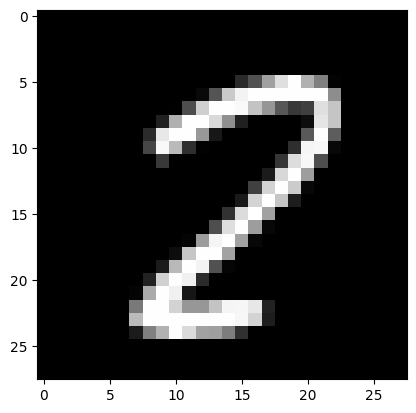

Predicted:  8


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 임의의 테스트 이미지 선택
idx = np.random.randint(0, x_test.shape[0])
test_image = x_test[idx]
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.show()

# 모델에 적용할 수 있도록 차원 확장
test_image = np.expand_dims(test_image, axis=0)

# 예측 수행
prediction = model.predict(test_image)

# 결과 출력 (소프트맥스 출력을 argmax로 클래스 인덱스로 변환)
print("Predicted: ", np.argmax(prediction))


## 실습 3

In [69]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 첫 번째 이미지 로드 및 전처리
image1 = Image.open('dog.jpg')
image1 = image1.resize((32, 32))  
image_array1 = np.array(image1) / 255.0  

# 두 번째 이미지 로드 및 전처리
image2 = Image.open('cat.jpg')
image2 = image2.resize((32, 32))  
image_array2 = np.array(image2) / 255.0  

# 입력 데이터와 라벨 설정 
input_data = np.stack([image_array1, image_array2]) # shape: (2, 32, 32 ,3)
labels = np.array([1 ,0]) # 'dog.jpg' -> class 1 , 'cat.jpg' -> class 0

# 간단한 CNN 모델 생성
model = models.Sequential()
model.add(layers.Conv2D(32 ,(3 ,3), activation='relu', input_shape=(32 ,32 ,3)))
model.add(layers.MaxPooling2D((2 ,2)))
model.add(layers.Conv2D(64 ,(3 ,3), activation='relu'))
model.add(layers.MaxPooling2D((2 ,2)))
model.add(layers.Conv2D(64 ,(3 ,3), activation='relu'))

# Dense 레이어 추가 
model.add(layers.Flatten())
model.add(layers.Dense(64 ,activation='relu'))
model.add(layers.Dense(10))

# 모델 구조 출력 
print(model.summary())

# 모델 컴파일 (손실함수 : binary_crossentropy - 이진 분류 문제에 적합)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 학습.
history=model.fit(input_data,
                  labels,
                  epochs=10)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_15 (Flatten)        (None, 1024)            

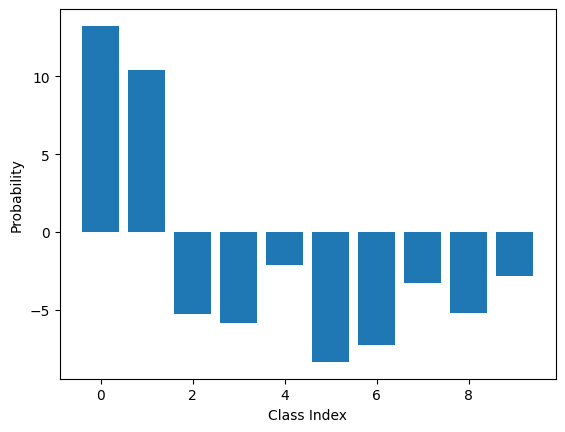

In [67]:
# 첫 번째 이미지에 대한 예측 확률
probabilities = predictions[1]

# 막대 그래프로 표시
plt.bar(range(len(probabilities)), probabilities)
plt.xlabel('Class Index')
plt.ylabel('Probability')
plt.show()

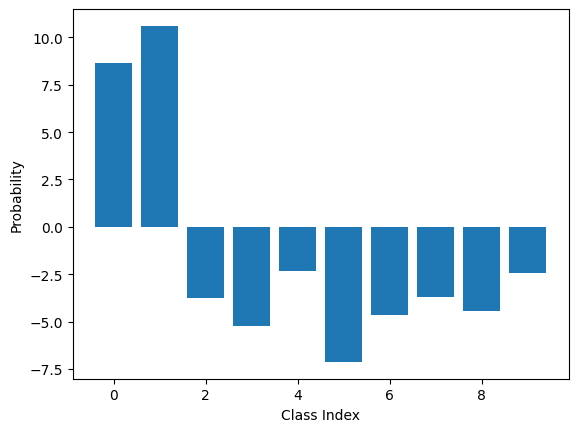

In [68]:
# 두 번째 이미지에 대한 예측 확률
probabilities = predictions[0]

# 막대 그래프로 표시
plt.bar(range(len(probabilities)), probabilities)
plt.xlabel('Class Index')
plt.ylabel('Probability')
plt.show()